In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_ds, test_ds = tfds.load(
    'mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
)
train_images, train_labels = tfds.as_numpy(train_ds)
test_images, test_labels = tfds.as_numpy(test_ds)

In [3]:
train_images.shape

(60000, 28, 28, 1)

In [4]:
train_labels

array([4, 1, 0, ..., 6, 1, 5])

In [5]:
test_images.shape

(10000, 28, 28, 1)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([2, 0, 4, ..., 8, 0, 5])

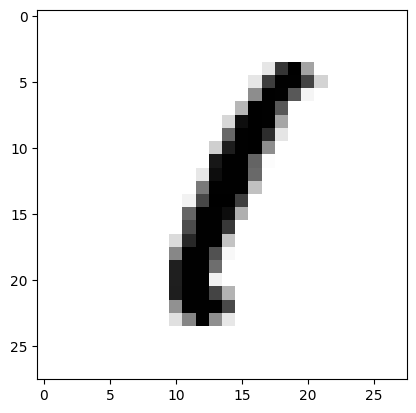

1


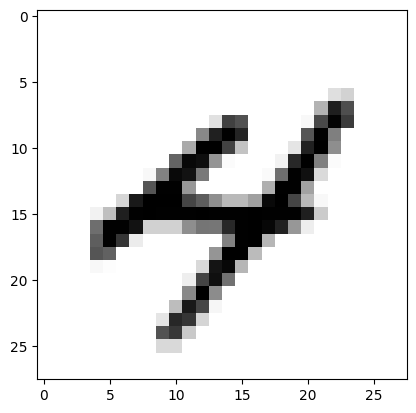

4


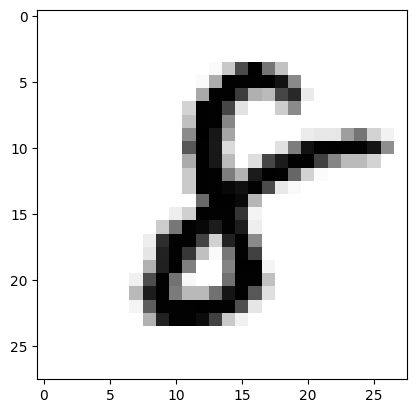

8


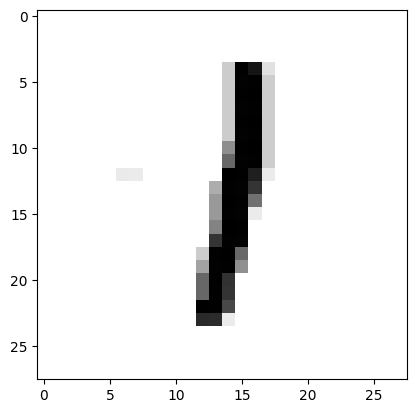

1


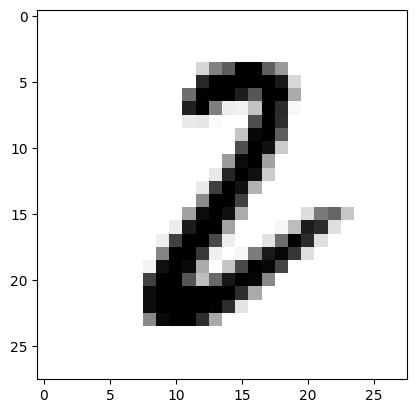

2


In [8]:
import matplotlib.pyplot as plt
for index in range(80,85):
    digit=train_images[index]
    label=train_labels[index]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()
    print(label)

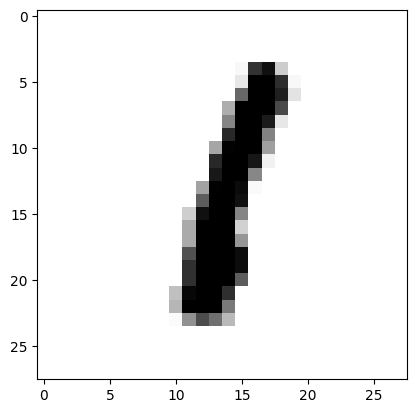

1


In [9]:
import matplotlib.pyplot as plt
index=int(input("Digit #:"))
digit=train_images[index]
label=train_labels[index]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(label)

In [10]:
my_slice=train_images[10:100]
my_slice.shape

(90, 28, 28, 1)

In [11]:
my_slice=train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28, 1)

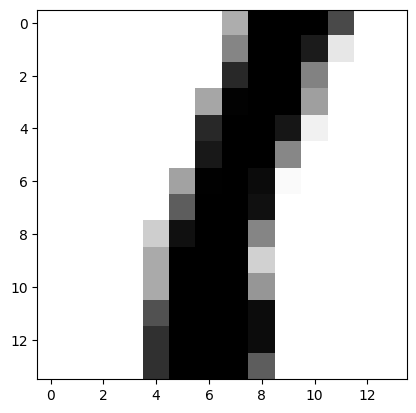

1


In [12]:
import matplotlib.pyplot as plt
index=int(input("Digit #:"))
digit=train_images[index, 7:-7, 7:-7]
label=train_labels[index]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(label)

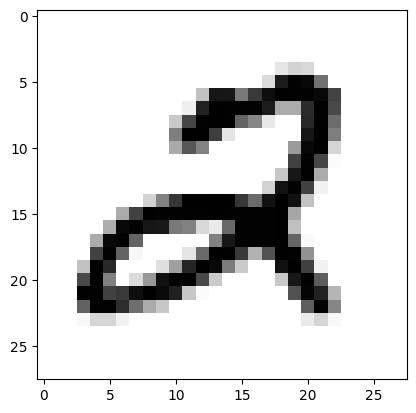

2


In [13]:
import matplotlib.pyplot as plt
digit=test_images[0]
label=test_labels[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(label)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [15]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [17]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2534 - accuracy: 0.9270
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1034 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9883


In [18]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 41ms/step


array([5.4036441e-13, 1.1377244e-11, 9.9999976e-01, 1.4972031e-07,
       4.7406296e-10, 1.6413566e-08, 3.0330669e-09, 1.7978717e-10,
       8.9177625e-08, 1.8329120e-10], dtype=float32)

In [19]:
predictions[0].argmax()

2

In [20]:
predictions[0][7]

1.7978717e-10

In [21]:
test_labels[0]

2

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 685us/step - loss: 0.0658 - accuracy: 0.9811
test_acc: 0.9811000227928162
